In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import constants

In [125]:
points = pd.read_csv("points_by_week.csv", index_col=0)
games = pd.read_csv("games_by_week.csv", index_col=0)

In [126]:
df = points/games-1.5

In [127]:
# Sort so top teams have lines drawn on top
week = 17
df = df.sort_values(by=[str(week)], ascending=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
NJNY,1.5,0.0,0.000000,-0.50,0.000000,0.300000,0.000000,-0.214286,-0.375000,-0.166667,-0.300000,-0.409091,-0.500000,-0.576923,-0.700000,-0.750000,-0.833333
LOU,-1.5,-1.0,-0.833333,0.10,-0.166667,-0.357143,-0.500000,-0.500000,-0.500000,-0.590909,-0.583333,-0.653846,-0.633333,-0.625000,-0.625000,-0.676471,-0.722222
WAS,1.5,1.5,0.000000,-0.25,-0.300000,-0.500000,-0.611111,-0.600000,-0.681818,-0.750000,-0.730769,-0.714286,-0.700000,-0.750000,-0.750000,-0.735294,-0.611111
ORL,-1.5,0.0,-0.166667,-0.10,-0.166667,-0.357143,-0.500000,-0.611111,-0.600000,-0.409091,-0.416667,-0.423077,-0.428571,-0.300000,-0.187500,-0.264706,-0.333333
NC,-1.5,-1.5,-1.500000,-1.50,-1.250000,-0.700000,-0.333333,-0.500000,-0.625000,-0.611111,-0.611111,-0.600000,-0.590909,-0.666667,-0.500000,-0.433333,-0.205882
CHI,1.5,1.5,0.000000,0.50,0.250000,0.333333,0.375000,0.277778,0.400000,0.318182,0.166667,0.038462,0.142857,0.033333,-0.062500,0.029412,0.000000
LA,1.5,0.0,0.500000,0.75,0.300000,-0.500000,0.125000,-0.055556,-0.100000,0.045455,0.045455,-0.083333,-0.115385,0.000000,-0.033333,0.062500,0.029412
RGN,-1.5,-1.0,-0.833333,-0.75,0.000000,-0.214286,-0.250000,-0.055556,0.100000,0.045455,-0.083333,0.038462,-0.100000,0.000000,0.000000,0.088235,0.055556
HOU,-1.5,0.0,-0.166667,0.25,0.100000,0.333333,0.000000,0.166667,0.000000,-0.136364,0.000000,0.115385,0.214286,0.166667,0.147059,0.111111,0.078947
SD,1.5,1.5,1.500000,0.90,0.500000,0.357143,0.166667,0.300000,0.409091,0.250000,0.192308,0.285714,0.166667,0.062500,0.147059,0.222222,0.131579


<Figure size 28800x16200 with 0 Axes>

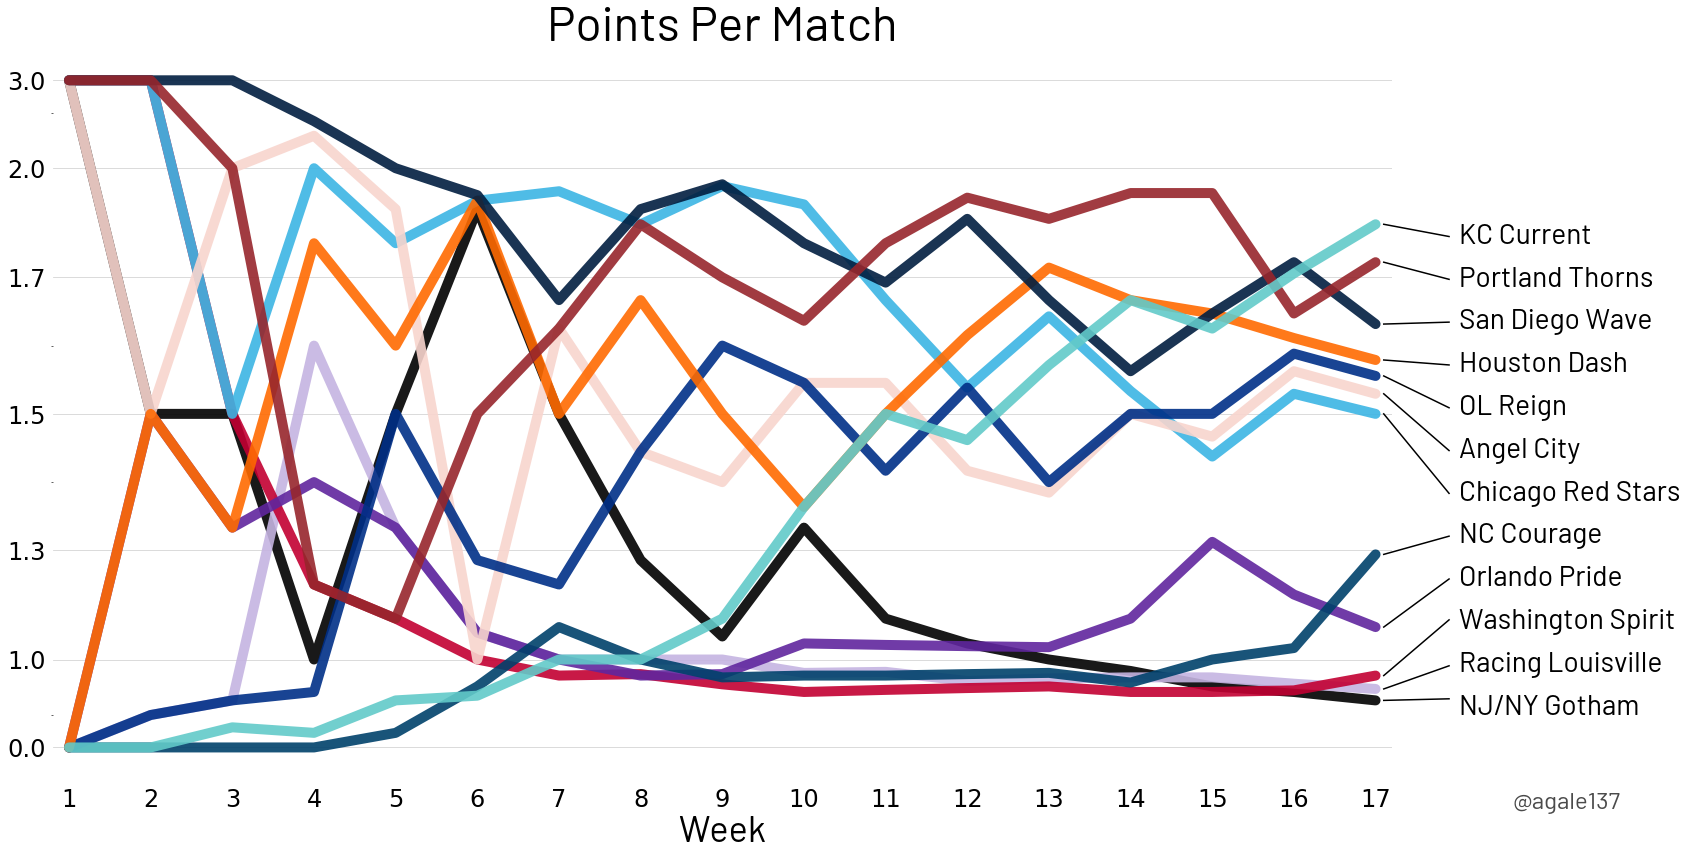

In [143]:
barlow = fm.FontProperties(fname="/home/agale/nwsl-analytics/nwsl-rank/Barlow.otf")
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()

# Title
plt.title("Points Per Match", fontproperties=barlow, size=48)

# General
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)

# Ticks
plt.yscale("symlog", linthresh=0.3)


def format_fn(tick_val, tick_pos):
    return tick_val + 1.5


ax.yaxis.set_major_formatter(format_fn)
ax.set_yticks([-1.5, -0.5, -0.2, 0, 0.2, 0.5, 1.5])
ax.yaxis.grid(True, color="lightgray")
ax.tick_params(axis="both", which="major", labelsize=24)
plt.xlim([0 - 0.2, week - 0.8])
plt.xlabel("Week", fontproperties=barlow, size=36)

for i, team in enumerate(df.index):
    ax.plot(
        df.columns,
        df.loc[team],
        linewidth=10,
        color=constants.colors[team],
        alpha=0.9,
        solid_capstyle="round",
    )

    tmin = 0.1
    tmax = 0.8

    ypos = tmin + (tmax - tmin) * (i / len(df.index))

    ax.text(
        1.05,
        ypos,
        constants.teams[team],
        transform=ax.transAxes,
        color="black",
        fontsize=28,
        fontproperties=barlow,
        fontweight="bold",
        va="center",
        ha="left",
    )

    axis_to_data = ax.transAxes + ax.transData.inverted()
    plt.plot(
        [week - 1 + 0.1, week - 0.1],
        [
            df.loc[team][-1],
            axis_to_data.transform([0, ypos])[1] * 1.1 - (0.1 if i < 2 else 0),
        ],
        color="black",
        clip_on=False,
    )

# Username
plt.text(
    week + 2,
    -3,
    "@agale137",
    color=constants.text[team],
    fontsize=24,
    alpha=0.7,
    fontproperties=barlow,
    va="center",
    ha="right",
)

# Save image
plt.savefig("week" + str(week) + "_ppm.png", bbox_inches="tight")